Epoch 1/100 - Train Loss: 0.6961, Train Accuracy: 0.0912, Validation Loss: 0.6941, Validation Accuracy: 0.0930
Epoch 2/100 - Train Loss: 0.6972, Train Accuracy: 0.0912, Validation Loss: 0.6940, Validation Accuracy: 0.0930
Epoch 3/100 - Train Loss: 0.6956, Train Accuracy: 0.0912, Validation Loss: 0.6939, Validation Accuracy: 0.0930
Epoch 4/100 - Train Loss: 0.6968, Train Accuracy: 0.0912, Validation Loss: 0.6939, Validation Accuracy: 0.0930
Epoch 5/100 - Train Loss: 0.6985, Train Accuracy: 0.0912, Validation Loss: 0.6938, Validation Accuracy: 0.0930
Epoch 6/100 - Train Loss: 0.6969, Train Accuracy: 0.0912, Validation Loss: 0.6938, Validation Accuracy: 0.0930
Epoch 7/100 - Train Loss: 0.6966, Train Accuracy: 0.0912, Validation Loss: 0.6937, Validation Accuracy: 0.0930
Epoch 8/100 - Train Loss: 0.6935, Train Accuracy: 0.0912, Validation Loss: 0.6936, Validation Accuracy: 0.0930
Epoch 9/100 - Train Loss: 0.6949, Train Accuracy: 0.0912, Validation Loss: 0.6936, Validation Accuracy: 0.0930
E

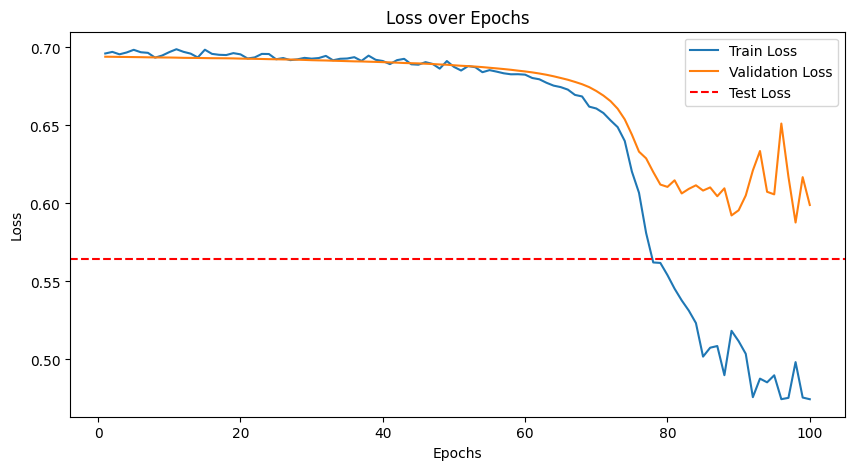

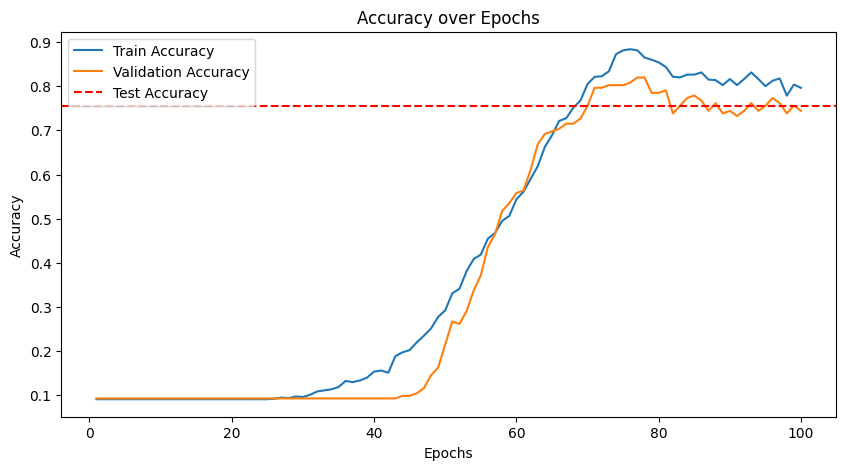

In [1]:
from config import load_config 
from trainer import ModelTrainer
from model import SentimentClassifier
from dataset import SentimentDataset
from processor import TextProcessor
from model_visualizer import ModelVisualizer
import torch
from torch.utils.data import DataLoader

config = load_config("config.yaml")

processor = TextProcessor(config)
train_x, train_y, val_x, val_y, test_x, test_y = processor.prepare_datasets()

train_dataset = SentimentDataset(train_x, train_y, config["MAX_SEQ_LEN"])
val_dataset = SentimentDataset(val_x, val_y, config["MAX_SEQ_LEN"])
test_dataset = SentimentDataset(test_x, test_y, config["MAX_SEQ_LEN"])

train_loader = DataLoader(train_dataset, batch_size=config["BATCH_SIZE"], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=config["BATCH_SIZE"], shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=config["BATCH_SIZE"], shuffle=False)

model = SentimentClassifier(
    vocab_size=config["VOCAB_SIZE"],
    embedding_dim=config["EMBEDDING_DIM"],
    hidden_dim=config["HIDDEN_DIM"],
    num_classes=config["NUM_CLASSES"],
    dropout_prob=config["DROPOUT_PROB"],
)

weights = torch.tensor([11.0, 1.0]).to(config["DEVICE"])
loss_fn = torch.nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.Adam(model.parameters(), lr=config["LEARNING_RATE"])

trainer = ModelTrainer(train_loader, val_loader, model, loss_fn, optimizer, config)
trainer.train()

test_loss, test_accuracy = trainer.test(test_loader)

visualizer = ModelVisualizer(
    train_losses=trainer.train_losses,
    val_losses=trainer.val_losses,
    train_accuracies=trainer.train_accuracies,
    val_accuracies=trainer.val_accuracies,
    epochs=config["EPOCHS"],
    test_loss=test_loss,
    test_accuracy=test_accuracy
)
visualizer.plot_metrics()


Рассмотрим первый график:
 Начиная с 50-й эпохи, функция потерь на обучающей выборке резко снижается, достигая минимальных значений (~0.53) ближе к 100-й эпохе. Это говорит о том, что модель начинает эффективно обучаться на предоставленных данных. 
После 50-й эпохи Validation Loss начинает плавно уменьшаться, достигая минимума после 80-й эпохи (~0.6). 
Признаки переобучения отсутствуют. Модель сохраняет обобщающую способность, а небольшие колебания Validation Loss не являются критическими, так как колебания находятся в умеренном диапазоне (от ~0.6 до ~0.65). Данные колебания могут быть вызваны вариативностью данных. Validation Loss остаётся близким к Train Loss, что свидетельствует о том, что модель продолжает хорошо обобщать. 
Значение тестовой функции потерь (~0.55) фиксировано и совпадает с минимальной Validation Loss. Это может означать, что тестирование проводилось на эпохе с наилучшими показателями Validation Loss.

Рассмотрим второй график:
Синяя линия (Train Accuracy): Точность на обучающей выборке постепенно растет и достигает высокого значения (~0.8) ближе к 80-й эпохе.
Оранжевая линия (Validation Accuracy): Точность на валидационной выборке растет почти параллельно обучающей и показывает высокую точность.
Точность на тестовой выборке составляет ~0.78, что схоже с валидационной точностью.

Модель демонстрирует хорошую точность на всех выборках, что говорит о ее адекватной способности к обобщению. Значения Train Accuracy и Validation Accuracy близки, что говорит об отсутствии переобучения.

In [1]:
from config import load_config 
from model_evaluator import ModelEvaluator
from trainer import ModelTrainer
from model import SentimentClassifier
from dataset import SentimentDataset
from processor import TextProcessor
import torch
from torch.utils.data import DataLoader

config = load_config("config.yaml")

processor = TextProcessor(config)
train_x, train_y, val_x, val_y, test_x, test_y = processor.prepare_datasets()

train_dataset = SentimentDataset(train_x, train_y, config["MAX_SEQ_LEN"])
val_dataset = SentimentDataset(val_x, val_y, config["MAX_SEQ_LEN"])
test_dataset = SentimentDataset(test_x, test_y, config["MAX_SEQ_LEN"])

train_loader = DataLoader(train_dataset, batch_size=config["BATCH_SIZE"], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=config["BATCH_SIZE"], shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=config["BATCH_SIZE"], shuffle=False)

model = SentimentClassifier(
    vocab_size=config["VOCAB_SIZE"],
    embedding_dim=config["EMBEDDING_DIM"],
    hidden_dim=config["HIDDEN_DIM"],
    num_classes=config["NUM_CLASSES"],
    dropout_prob=config["DROPOUT_PROB"],
)

weights = torch.tensor([11.0, 1.0]).to(config["DEVICE"])
loss_fn = torch.nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.Adam(model.parameters(), lr=config["LEARNING_RATE"])

trainer = ModelTrainer(train_loader, val_loader, model, loss_fn, optimizer, config)

trainer.train()

test_loss, test_accuracy = trainer.test(test_loader)

test_report = ModelEvaluator(model, config).evaluate_model(test_loader)

train_report = ModelEvaluator(model, config).evaluate_model(trainer.train_loader, mode="train")

print("Test Classification Report:")
print(test_report)

print("Train Classification Report:")
print(train_report)


Epoch 1/100 - Train Loss: 0.6970, Train Accuracy: 0.0912, Validation Loss: 0.6946, Validation Accuracy: 0.0930
Epoch 2/100 - Train Loss: 0.6984, Train Accuracy: 0.0912, Validation Loss: 0.6945, Validation Accuracy: 0.0930
Epoch 3/100 - Train Loss: 0.6985, Train Accuracy: 0.0912, Validation Loss: 0.6944, Validation Accuracy: 0.0930
Epoch 4/100 - Train Loss: 0.6981, Train Accuracy: 0.0912, Validation Loss: 0.6944, Validation Accuracy: 0.0930
Epoch 5/100 - Train Loss: 0.6970, Train Accuracy: 0.0912, Validation Loss: 0.6944, Validation Accuracy: 0.0930
Epoch 6/100 - Train Loss: 0.6986, Train Accuracy: 0.0912, Validation Loss: 0.6943, Validation Accuracy: 0.0930
Epoch 7/100 - Train Loss: 0.6988, Train Accuracy: 0.0912, Validation Loss: 0.6942, Validation Accuracy: 0.0930
Epoch 8/100 - Train Loss: 0.6961, Train Accuracy: 0.0912, Validation Loss: 0.6942, Validation Accuracy: 0.0930
Epoch 9/100 - Train Loss: 0.7001, Train Accuracy: 0.0912, Validation Loss: 0.6941, Validation Accuracy: 0.0930
E

 Сравним метрики Test и Train:
1) Разница в точности (accuracy): 
accuracy у Test: 80.23%
accuracy у Train: 84.25% - Точность на обучении выше, чем на тесте, но разница в ~4% невелика, что не указывает на явное переобучение.
 
2) Разница в F1-Score:
F1-Score на Test: 0.8820
F1-Score на Train: 0.9083
Разница ~2.6%. - разница так же небольшая, что говорит об отсутствии переобучения.